

```
Name : Sudarsun S
RegNo : 20BCE1699
Machine Learning Embedded Lab
Topic : K-medoid & K-means clustering
```



1.	Import the dataset into data frame


In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.	Display all the feature names



In [2]:
feature_names = data.columns
print(feature_names)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


3.	Check for missing values and do data cleaning

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

data = data.dropna()
print("\nMissing Values After Droping NA:")
print(data.isnull().sum())
print("\nShape of data after cleaning missing values: ",data.shape)

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing Values After Droping NA:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Shape of data after cleaning missing values:  (21611, 21)


4.	Display the summary of the data

In [4]:
print("Summary of the Data:")
display(data.describe())


Summary of the Data:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


5.	Using IQR score remove outliers if any


In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

print("Shape of data after removing outliers: ",data.shape,"\n")


Shape of data after removing outliers:  (14933, 21) 



<ipython-input-5-298030fe3b2d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-5-298030fe3b2d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-5-298030fe3b2d>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


6.	Display the summary of the data after removing outliers

In [6]:
print("Summary of the Data After Removing Outliers:")
display(data.describe())

Summary of the Data After Removing Outliers:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.493300e+04,1.493300e+04,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.0,14933.0,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.0,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000
mean,4.729054e+09,4.385271e+05,3.262104,1.972226,1814.163263,6988.476194,1.471372,0.0,0.0,3.420411,7.380366,1585.185227,228.978035,1971.719614,0.0,98079.757048,47.558882,-122.230145,1796.793745,6867.985736
std,2.851552e+09,1.803027e+05,0.772906,0.646009,614.661723,3355.816806,0.547931,0.0,0.0,0.647206,0.805050,601.516239,353.249353,29.249979,0.0,53.481500,0.142092,0.123698,507.272282,2987.822978
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,47.189500,-122.472000,620.000000,651.000000
25%,2.321300e+09,3.000000e+05,3.000000,1.500000,1350.000000,4690.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1952.000000,0.0,98033.000000,47.457600,-122.333000,1430.000000,4800.000000
50%,4.037800e+09,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1974.000000,0.0,98072.000000,47.569700,-122.264000,1710.000000,7172.000000
75%,7.454000e+09,5.475000e+05,4.000000,2.500000,2210.000000,8925.000000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,450.000000,1999.000000,0.0,98118.000000,47.683500,-122.153000,2090.000000,8649.000000
max,9.900000e+09,1.127000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,47.777600,-121.821000,3640.000000,17550.000000


7.	Remove the columns - date and id


In [7]:
columns_to_remove = ["date", "id"]
data = data.drop(columns=columns_to_remove, axis=1)

print("DataFrame after removing 'date' and 'id' columns:\n")
display(data)

DataFrame after removing 'date' and 'id' columns:



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


8.	Normalize the values between 0 and 1 using standard scalar method


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_standardized, columns=data.columns)
data = data_normalized
print("Normalized Data:\n")
display(data)


Normalized Data:



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.201504,-0.339127,-1.505022,-1.031762,-0.398866,-0.860305,0.0,0.0,-0.649600,-0.47249,-0.673629,-0.648227,-0.571630,0.0,1.837014,-0.335580,-0.217108,-0.900520,-0.407664
1,-1.433898,-1.632989,-1.505022,-1.698818,0.897434,-0.860305,0.0,0.0,-0.649600,-1.71469,-1.355263,-0.648227,-1.323793,0.0,-0.967789,1.259917,-0.023080,1.820003,0.399640
2,0.917782,0.954736,1.591012,0.237271,-0.592566,-0.860305,0.0,0.0,2.440708,-0.47249,-0.889757,1.927943,-0.229738,0.0,1.051669,-0.268016,-1.316601,-0.861093,-0.625221
3,0.396419,-0.339127,0.042995,-0.218279,0.325274,-0.860305,0.0,0.0,-0.649600,0.76971,0.157632,-0.648227,0.522424,0.0,-0.107649,0.407625,1.496808,0.006321,0.212541
4,-1.004051,-0.339127,0.429999,-0.161335,-0.050504,0.964803,0.0,0.0,-0.649600,-0.47249,0.215820,-0.648227,0.795938,0.0,-1.435256,-1.753720,-0.783023,0.869791,-0.016396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14928,-0.435544,-0.339127,0.817003,-0.462324,-1.745528,2.789911,0.0,0.0,-0.649600,0.76971,-0.091747,-0.648227,1.274587,0.0,0.434613,0.988253,-0.936629,-0.525956,-1.793669
14929,-0.213687,0.954736,0.817003,0.806709,-0.350292,0.964803,0.0,0.0,-0.649600,0.76971,1.205020,-0.648227,1.445533,0.0,1.238656,-0.339099,-1.065981,0.065463,0.111126
14930,-0.202034,-1.632989,-1.892027,-1.292076,-1.680266,0.964803,0.0,0.0,-0.649600,-0.47249,-0.939632,-0.648227,1.274587,0.0,1.201258,0.249975,-0.556657,-1.531366,-1.626987
14931,-0.213687,-0.339127,0.817003,-0.348436,-1.370942,0.964803,0.0,0.0,-0.649600,0.76971,0.024630,-0.648227,1.103641,0.0,-0.986487,-0.171596,1.302779,-0.762523,-1.867973


9.	Implement K-medoids clustering & K means clustering using  Euclidean distance measure


In [9]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:00


In [10]:
#K - Means  Clusterring
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
cluster_labels = kmeans.labels_
print("K-Means Cluster Labels:")
print(cluster_labels)

from sklearn_extra.cluster import KMedoids
k = 3
kmedoids = KMedoids(n_clusters=k, random_state=0, metric = "euclidean")
kmedoids.fit(data)
cluster_labels = kmedoids.labels_
print("K-Medoids Cluster Labels:")
print(cluster_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Cluster Labels:
[2 0 2 ... 2 1 2]
K-Medoids Cluster Labels:
[1 1 1 ... 1 2 1]


10.	Find the optimal value of K  for both

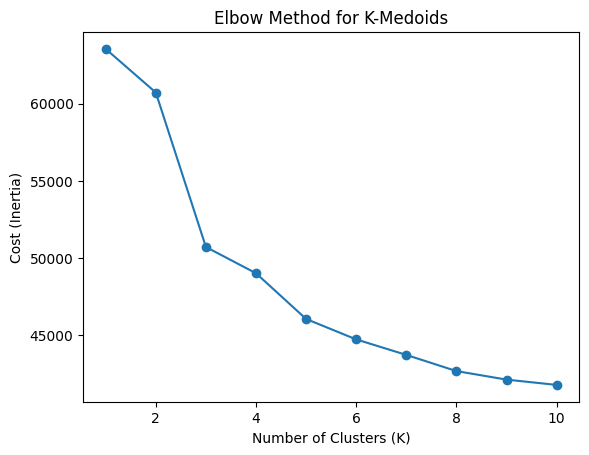

In [11]:
import matplotlib.pyplot as plt
k_values = range(1, 11)
cost = []

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0, metric = "euclidean")
    kmedoids.fit(data)
    cost.append(kmedoids.inertia_)

plt.plot(k_values, cost, marker='o')
plt.title("Elbow Method for K-Medoids")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost (Inertia)")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

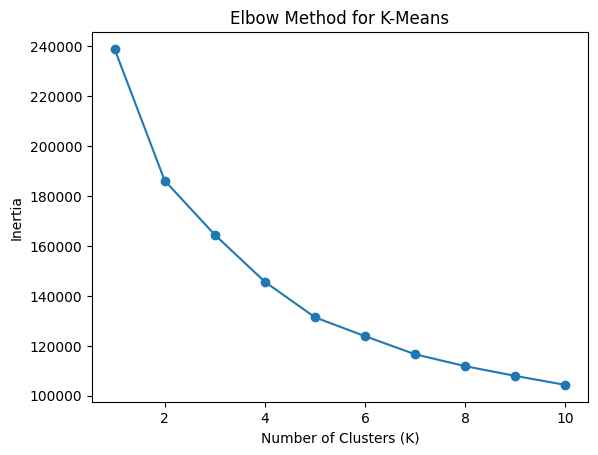

In [12]:
import matplotlib.pyplot as plt

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


### 11.	Display the number of iterations required to converge for both methods

In [13]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
print("Number of iterations in K-Means: ",kmeans.n_iter_)
kmedoids = KMedoids(n_clusters=k, random_state=0, metric = "euclidean").fit(data)
print("Number of iterations in K-Medoids",kmedoids.n_iter_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of iterations in K-Means:  44
Number of iterations in K-Medoids 3


### 12.	Print the cluster accuracy for both methods


In [14]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(data, kmeans.labels_)
silhouette_kmedoids = silhouette_score(data, kmedoids.labels_)

print("Silhouette Score for K-Means:", silhouette_kmeans)
print("Silhouette Score for K-Medoids:", silhouette_kmedoids)

Silhouette Score for K-Means: 0.16522730851845344
Silhouette Score for K-Medoids: 0.12634592410751058


13.	Add the label to each record after clustering


In [15]:
cluster_labels = kmeans.labels_
data['Cluster_Label'] = cluster_labels
display(data.head())


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster_Label
0,-1.201504,-0.339127,-1.505022,-1.031762,-0.398866,-0.860305,0.0,0.0,-0.649600,-0.47249,-0.673629,-0.648227,-0.571630,0.0,1.837014,-0.335580,-0.217108,-0.900520,-0.407664,8
1,-1.433898,-1.632989,-1.505022,-1.698818,0.897434,-0.860305,0.0,0.0,-0.649600,-1.71469,-1.355263,-0.648227,-1.323793,0.0,-0.967789,1.259917,-0.023080,1.820003,0.399640,8
2,0.917782,0.954736,1.591012,0.237271,-0.592566,-0.860305,0.0,0.0,2.440708,-0.47249,-0.889757,1.927943,-0.229738,0.0,1.051669,-0.268016,-1.316601,-0.861093,-0.625221,3
3,0.396419,-0.339127,0.042995,-0.218279,0.325274,-0.860305,0.0,0.0,-0.649600,0.76971,0.157632,-0.648227,0.522424,0.0,-0.107649,0.407625,1.496808,0.006321,0.212541,4
4,-1.004051,-0.339127,0.429999,-0.161335,-0.050504,0.964803,0.0,0.0,-0.649600,-0.47249,0.215820,-0.648227,0.795938,0.0,-1.435256,-1.753720,-0.783023,0.869791,-0.016396,6


14.	For each cluster compute the  Number of houses.

In [16]:
cluster_counts = data.groupby('Cluster_Label').size()
print("Number of Houses in Each Cluster:")
print(cluster_counts)


Number of Houses in Each Cluster:
Cluster_Label
0    1731
1    1077
2    1618
3    1465
4    1490
5    1321
6    1497
7    1309
8    1992
9    1433
dtype: int64


15.	 For each cluster compute the average house sale price


In [17]:
cluster_counts = data.groupby('Cluster_Label').size()
print("Number of Houses in Each Cluster:")
print(cluster_counts)

Number of Houses in Each Cluster:
Cluster_Label
0    1731
1    1077
2    1618
3    1465
4    1490
5    1321
6    1497
7    1309
8    1992
9    1433
dtype: int64


16.	using the class labels implement Decision tree using both entropy and gini index  with max  depth of the tree as 4


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

X = data.drop(['Cluster_Label'], axis=1)
y = data['Cluster_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)


entropy_train_predictions = dt_entropy.predict(X_train)
gini_train_predictions = dt_gini.predict(X_train)
entropy_test_predictions = dt_entropy.predict(X_test)
gini_test_predictions = dt_gini.predict(X_test)

entropy_train_accuracy = accuracy_score(y_train, entropy_train_predictions)
gini_train_accuracy = accuracy_score(y_train, gini_train_predictions)
entropy_train_f1 = f1_score(y_train, entropy_train_predictions, average='weighted')
gini_train_f1 = f1_score(y_train, gini_train_predictions, average='weighted')

# Perform K-fold cross-validation
k = 5
entropy_cv_scores = cross_val_score(dt_entropy, X, y, cv=k, scoring='accuracy')
gini_cv_scores = cross_val_score(dt_gini, X, y, cv=k, scoring='accuracy')

print("Decision Tree with Entropy (Depth 4) - Train Accuracy:", entropy_train_accuracy)
print("Decision Tree with Entropy (Depth 4) - Train F1-Score:", entropy_train_f1)
print("Decision Tree with Gini (Depth 4) - Train Accuracy:", gini_train_accuracy)
print("Decision Tree with Gini (Depth 4) - Train F1-Score:", gini_train_f1)
print("K-fold Cross-Validation Accuracy Scores (Entropy):", entropy_cv_scores)
print("K-fold Cross-Validation Accuracy Scores (Gini):", gini_cv_scores)


Decision Tree with Entropy (Depth 4) - Train Accuracy: 0.7753222836095764
Decision Tree with Entropy (Depth 4) - Train F1-Score: 0.7787782568322654
Decision Tree with Gini (Depth 4) - Train Accuracy: 0.7901389586472459
Decision Tree with Gini (Depth 4) - Train F1-Score: 0.7926709876735991
K-fold Cross-Validation Accuracy Scores (Entropy): [0.7710077  0.76431202 0.78473385 0.78868051 0.77260549]
K-fold Cross-Validation Accuracy Scores (Gini): [0.768999   0.76129896 0.79075996 0.79102478 0.79437374]
